In [14]:
def preprocess_data(data):
    df = data.copy()

    y = df['Target'].copy()
    X = df.drop('Target', axis=1).copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    return X_train, X_test, y_train, y_test

In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from mne import EpochsArray
from mne.channels import make_standard_montage
from mne.io import RawArray

# Step 1: Segmentation
def segment_eeg_data(eeg_data, segment_length_seconds, sfreq):
    segment_length_samples = int(segment_length_seconds * sfreq)
    num_segments = len(eeg_data) // segment_length_samples
    segments = np.array_split(eeg_data[:num_segments * segment_length_samples], num_segments)
    return segments

# Step 2: Feature Extraction
def extract_features(eeg_segments):
    # Example: Extract mean and variance of each segment
    features = np.array([[np.mean(segment), np.var(segment)] for segment in eeg_segments])
    return features

# Step 3: Normalization
def normalize_features(features):
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(features)
    return normalized_features

# Example EEG data (replace with your own data)
eeg_data = np.random.rand(10000)  # Example EEG data of length 10 seconds
sfreq = 1000  # Sampling frequency in Hz

# Step 1: Segment EEG data
segment_length_seconds = 1
segments = segment_eeg_data(eeg_data, segment_length_seconds, sfreq)

# Step 2: Extract features
features = extract_features(segments)

# Step 3: Normalize features
normalized_features = normalize_features(features)

# Step 4: Train-Test Split
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(normalized_features, data["Target"][:len(normalized_features)], test_size=0.2, random_state=42)

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

2024-05-14 14:22:13.303193: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:22:14.374169: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:22:16.682561: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 14:22:20.239210: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [6]:
data = pd.read_csv('/workspaces/neurosity-sdk-python/Datas/ContinuousReading.csv')

In [7]:
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Target
count,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000,15376.000000
mean,-0.059808,-0.133852,-0.132425,-0.072027,-0.002587,0.026648,-0.001890,-0.063441,-0.107991,-0.097544,-0.024397,0.086587,0.183818,0.220484,0.178699,0.074400,0.520291
std,60.843658,60.243379,59.818727,59.664639,59.790254,60.178802,60.781713,61.471533,62.124904,62.675335,63.048173,63.168095,63.030173,62.672227,62.136181,61.499387,0.499604
min,-966.872991,-1003.294097,-1003.891615,-978.956503,-942.469512,-905.186684,-873.198491,-851.338250,-845.446142,-867.442778,-877.260619,-869.758991,-856.674895,-850.145088,-859.271681,-900.666529,0.000000
25%,-7.790274,-7.770336,-7.708088,-7.506101,-7.346275,-7.314130,-7.329459,-7.653278,-7.634746,-7.741315,-7.728402,-7.715148,-7.581876,-7.713318,-7.762769,-7.769855,0.000000
50%,-0.091734,-0.156009,-0.209689,-0.092042,0.151321,0.248125,0.095819,0.041860,-0.038306,-0.110339,-0.060996,0.084692,0.111848,0.196099,0.177093,0.090696,1.000000
75%,7.431759,7.457385,7.415034,7.284918,7.307689,7.443035,7.525624,7.484129,7.380006,7.357147,7.391864,7.515089,7.569289,7.442680,7.459868,7.460488,1.000000
max,1391.999963,1326.110121,1204.212746,1211.093008,1188.815540,1138.625056,1063.885773,1134.946033,1216.126759,1259.260615,1347.420546,1393.286657,1395.583173,1365.989391,1338.888312,1394.045355,1.000000


In [14]:
#Segment the data each 200 data points and put them in a 2D array numpy array
def segment_data(data):
    segments = []
    segment_labels = []
    for i in range(0, len(data) - 400, 50):
        df = data.drop('Target', axis=1).copy()
        segment = df.values[i: i + 400]
        label = data['Target'][i]
        segments.append(segment)
        segment_labels.append(label)
    return np.array(segments), np.array(segment_labels)

In [15]:
segments, segments_labeles = segment_data(data)

In [16]:
print(segments.shape)

(300, 400, 16)


In [17]:
print(segments_labeles.shape)

(300,)


In [18]:
# Using segments and segments_labeles to train RNN model using gru layer. 
# First we need to split the data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(segments, segments_labeles, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 400, 16)
(30, 400, 16)
(270,)
(30,)


/home/vscode/.local/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 400, 128)       │        56,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,614,250 (25.23 MB)

 Trainable params: 6,614,250 (25.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.4594 - loss: 1.4851 - val_accuracy: 0.4568 - val_loss: 0.7590
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.7606 - loss: 0.5184 - val_accuracy: 0.4938 - val_loss: 0.8073
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.9224 - loss: 0.2147 - val_accuracy: 0.5309 - val_loss: 1.1150
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9460 - loss: 0.1980 - val_accuracy: 0.5432 - val_loss: 1.2362
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 0.9676 - loss: 0.1235 - val_accuracy: 0.5556 - val_loss: 1.4161
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.9641 - loss: 0.0644 - val_accuracy: 0.5556 - val_loss: 1.6214
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 0.8000
Test accuracy: 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00   

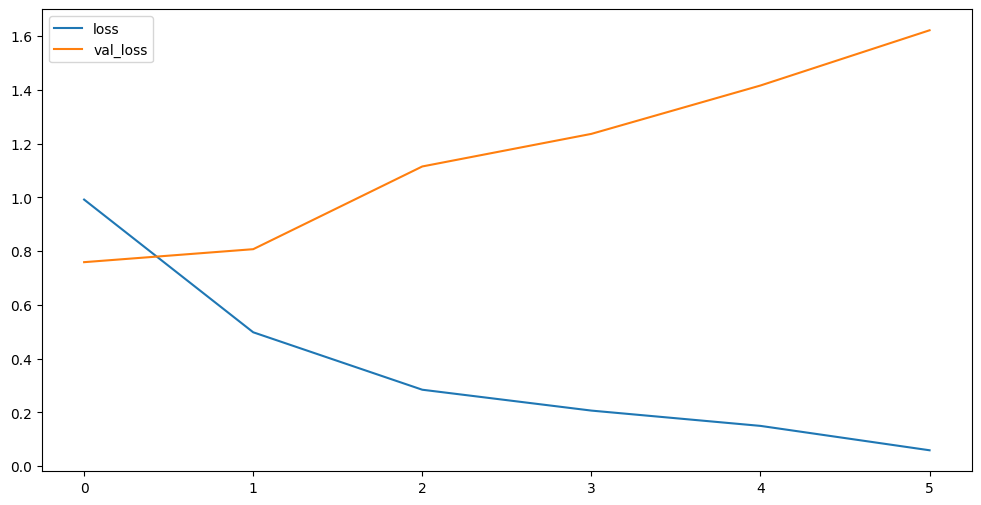

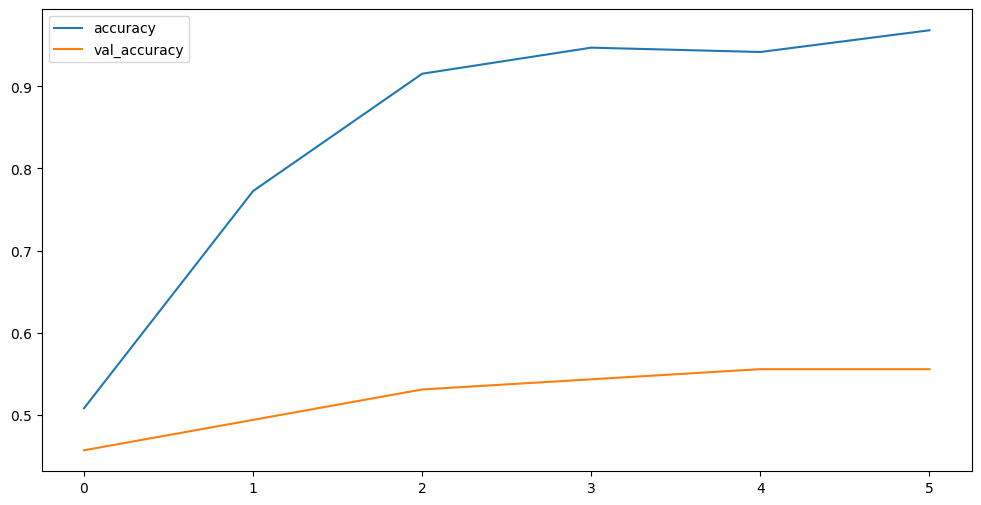

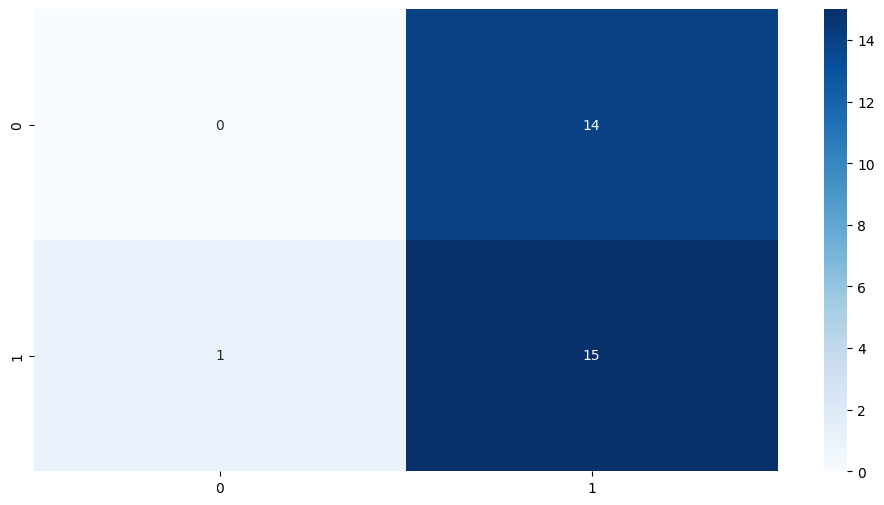

In [19]:
# Using the data train RNN model using gru layer.
model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model.summary()

history = model.fit(X_train, 
                    y_train, 
                    epochs=20, 
                    validation_split=0.3, 
                    batch_size=4,
                    callbacks=[tf.keras.callbacks.EarlyStopping(
                        monitor = "val_loss",
                        patience=5,
                        restore_best_weights=True)])

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

# Make predictions on the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Print classification report
print(classification_report(y_test, predicted_labels))

# Plot the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Save the model
model.save('rnn_model.keras')

In [48]:
# Build a RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1], 1)),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape the input data to match the input shape of the model
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Make predictions
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Save the model
model.save('/workspaces/neurosity-sdk-python/Datas/rnn_model.keras')

ValueError: cannot reshape array of size 777600 into shape (243,200,1)